<img src='https://user-images.githubusercontent.com/6457691/89746244-a6e2a200-daf3-11ea-9314-7863d544d73c.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 3*

# 📝 Assignment

---

## 1. Concat 

세션시간에 다뤘던 6개의 데이터를 1개로 합치세요.

데이터를 불러오기 위하여 아래의 코드를 참조하세요.

합쳐진 데이터의 이름은 `df`입니다.

```python
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv') 
# '000890.csv'
# '005300.csv'
# '027740.csv'
# '035810.csv'
# '136480.csv'
```



단, 모든 feature, 모든 데이터에 대해서가 아닌

- 매출액
- 자산총계
- EPS

- 제일 최근 분기의 데이터

에 대해서만 하면 됩니다.

||매출액|자산총계|EPS(원)|종목명|
|:-:|:-:|:-:|:-:|:-:|
|2020/09|6,243|10,897|453|하이트진로|
|...|...|...|...|...|
|2020/09|2,613|2,695|62|하림|

(첫부분은 값이 달라도 되며, 결과 shape는 6,4입니다.)

힌트 : 
- 데이터를 transpose
- column의 이름을 변경 및 설정
- 데이터의 일부 feature 선택
- `종목명`이라는 feature 지정
- 이후 `concat`으로 합치기
- 합친 이후의 index를 종목명으로 설정 및 drop

이라는 단계를 거치면 될겁니다.

In [5]:
def str_to_int(x):
  if x.replace(',',''):
    x = x.replace(',','')
  return int(x)

In [6]:
import pandas as pd
 
urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'

def mydf(myurl):
    df1 = pd.read_csv(urlhead + myurl).transpose()
    new_header = df1.iloc[0] 
    df1 = df1[1:]
    df1.columns = new_header
    return df1[-1:][['매출액','자산총계','EPS(원)']]

df3 = pd.DataFrame(
    { '종목명': ['하이트진로', '보해양조', '롯데칠성', '마니커', '이지홀딩스', '하림']}
     )

df = pd.concat([mydf('000080.csv'),mydf('000890.csv'),mydf('005300.csv'),mydf('027740.csv'),mydf('035810.csv'),mydf('136480.csv')])
df = df.reset_index()
df = df.drop(df.columns[0],axis = 1)
df = pd.concat([df3,df],axis = 1)
df['매출액'] = df['매출액'].apply(str_to_int)
df['자산총계'] = df['자산총계'].apply(str_to_int)
df['EPS(원)'] = df['EPS(원)'].apply(str_to_int)

## 2. Reshape 

방금 만든 데이터를 아래 예시와 같은 **tidy** 형태로 만드세요.

이때 tidy 데이터의 이름은 `df_tidy` 입니다.

|종목명|Feature|Value|
|:-:|:-:|:-:|
|하이트진로|매출액|6243|
|보해양조|매출액|205|
|롯데칠성|매출액|5980|
|...|...|...|
|마니커|EPS(원)|-61|
|이지홀딩스|EPS(원)|1168|
|하림|EPS(원)|62|

이 후 아래의 코드를 정상적으로 실행했을때 나오는 box의 수를 `res`에 저장하세요.

```python
sns.boxplot(data = df_tidy, x = '종목명', y = 'value');
```




In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,273 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [7]:
df_tidy = df.melt(id_vars='종목명')
df_tidy = df_tidy.rename(columns = {'variable':'Feature'})

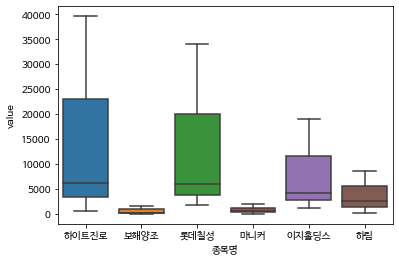

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
sns.boxplot(data = df_tidy, x = '종목명', y = 'value');
res = len(df_tidy['종목명'].unique()) 

## 3. Merge & Join +

pandas merge의 options중 how 에는 여러가지 옵션들이 있습니다.

공식 레퍼런스를 검색, 참조하여

아래 코드를 바탕으로 

다음과 같은 결과물을 만드는 코드를 작성하세요

변수의 이름은 `df2` 입니다.

|key1|key2|A|B|C|D|
|:-:|:-:|:-:|:-:|:-:|:-:|
|K0|K0|A0|B0|C0|D0|
|K0|K1|A1|B1|NaN|NaN|
|K1|K0|A2|B2|C1|D1|
|K1|K0|A2|B2|C2|D2|
|K2|K1|A3|B3|NaN|NaN|





In [13]:
import pandas as pd

left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [14]:
df2 = pd.merge(left,right, how = 'left', on=['key1','key2'])

In [15]:
df2

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


## Grading

이전 과제를 완료했다면, 아래의 코드를 실행하세요. 

In [12]:
import numpy as np

def grade(df,df2, df_tidy, res):
  score = 0
  score += (df['매출액'][2] == 5980)
  score += (df['자산총계'][3] == 1897)   
  score += (df2.equals(pd.DataFrame({
    'key1' : ['K0', 'K0', 'K1', 'K1', 'K2'],
    'key2' : ['K0', 'K1', 'K0', 'K0', 'K1'],
    'A' : ['A0', 'A1', 'A2', 'A2', 'A3'],
    'B' : ['B0', 'B1', 'B2', 'B2', 'B3'],
    'C' : ['C0', np.NaN, 'C1', 'C2', np.NaN],
    'D' : ['D0', np.NaN, 'D1', 'D2', np.NaN],
  }))) 
  score += (res == 6)
  score += (round(df_tidy['value'].mean(), 3) == 7090.444)
  return(score)

In [16]:
grade(df, df2, df_tidy, res)

5

## 🔥 도전과제

아래 링크들을 참조하여, 
특정 테마별로 포함되어 있는 종목의 데이터를 직접 csv형태로 수집하고 (아래 적힌 3개씩)

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=408>

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=36>

- 최종 분기에 해당하는 데이터

- 테마별 평균 데이터를 결과물로 만드는 코드를 작성하세요.

단, 모든 feature에 대해서가 아닌

- 매출액
- 자산총계
- EPS

에 대해서만 하면 됩니다.

|종목명|매출액|자산총계|EPS|
|:-:|:-:|:-:|:-:|
|대한해운|...|...|...|...|
|팬오션|...|...|...|...|
|KSS해운|...|...|...|...|
|세미콘라이트|...|...|...|...|
|오성첨단소재|...|...|...|...|
|에이아이비트|...|...|...|...|

---

|테마|매출액|자산총계|EPS|
|:-:|:-:|:-:|:-:|
|해운|...|...|...|
|마리화나(대마)|...|...|...|

이후 아래의 예시 처럼 seaborn을 사용하여 결과를 barplot으로 시각화하세요.

단, 한글이 깨지는 에러를 여러분이 직접 고쳐야합니다.

In [18]:
import pandas as pd
import seaborn as sns

dat = pd.DataFrame({
    'name' : ['해운', '대마'],
    'value' : [10000,5000]
})

dat

,name,value
0,해운,10000
1,대마,5000


In [65]:
import requests
from bs4 import BeautifulSoup

URL = "https://finance.naver.com/item/main.nhn?code=039230"

Financial_Statements = requests.get(URL)
html = Financial_Statements.text

soup = BeautifulSoup(html, 'html.parser')

finance_html = soup.select('div.section.cop_analysis div.sub_section')[0] 
#div.section.cop_analysis div.sub_section -> 개발자 도구를 사용해서 재무제표 정보가 어느 html요소로 구성되어 있는지 찾았고 왼쪽 요소임을 알 수 있었다.

#재무제표 날짜 정보 추출
th_data = [item.get_text().strip() for item in finance_html.select('thead th')] #BeaurifulSoup의 CSS selector 방식으로 해당 날짜 데이터들을 파이썬의 리스트 형식으로 모두 추출  
annual_date = th_data[3:7]
quarter_date = th_data[7:13]

#주요재무정보의 각 정보 추출
finance_index = [item.get_text().strip() for item in finance_html.select('th.h_th2')][:]
print(finance_index)
#재무제표의 데이터 추출 
finance_data = [item.get_text().strip() for item in finance_html.select('td')]

#넘파이로 데이터 변환
import numpy as np

#실제 재무제표 정보처럼 14*10의 크기로 재설정
finance_data = np.array(finance_data)
finance_data.resize(len(finance_index), 10)

finance_date = annual_date + quarter_date
# finance_date = quarter_date

import pandas as pd
finance = pd.DataFrame(data=finance_data[0:,0:], index=finance_index, columns=finance_date)

annual_finance = finance.iloc[:, :4]
quarter_finance = finance.iloc[:, 4:]

quarter_finance = quarter_finance.drop(quarter_finance.columns[5],axis = 1)
quarter_finance = quarter_finance[:13].transpose()


['주요재무정보', '최근 연간 실적', '최근 분기 실적', '매출액', '영업이익', '당기순이익', '영업이익률', '순이익률', 'ROE(지배주주)', '부채비율', '당좌비율', '유보율', 'EPS(원)', 'PER(배)', 'BPS(원)', 'PBR(배)', '주당배당금(원)', '시가배당률(%)', '배당성향(%)']


In [63]:
# quarter_finance = quarter_finance[['매출액','자산총계','EPS(원)']]
quarter_finance

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배)
2019.12,90,17,-77,18.34,-85.23,-28.34,34.87,184.83,15.68,-223,-0.95,"1,450",0.27
2020.03,91,1,22,0.97,23.87,-29.31,71.46,102.53,19.84,62,-0.40,"1,513",0.12
2020.06,59,1,-4,1.81,-7.39,-13.94,27.56,247.49,19.01,-13,-0.85,"1,500",0.12
2020.09,86,-11,-27,-12.66,-31.86,-16.25,24.44,251.87,13.03,-76,-0.73,"1,426",0.13
2020.12,57,-28,-69,-49.35,-121.21,-16.41,28.41,210.82,0.56,-187,-0.82,"1,230",0.15


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_te

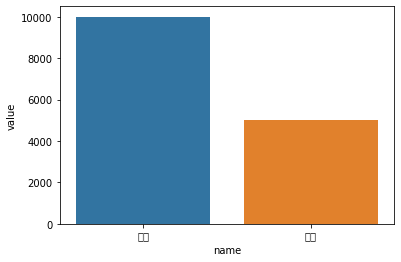

In [ ]:
sns.barplot(x = 'name', y = 'value', data = dat);